In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

#**Load Dataset**


In [3]:
# Load dataset
data_predict = pd.read_csv("/content/Dataset Kasus Pencurian.csv")
data_predict

,TEMPAT KEJADIAN PENCURIAN,WAKTU KEJADIAN,PELAKU MENGGUNAKAN ALAT,SASARAN KEJAHATAN,JUMLAH KERUGIAN,Modus Operandi,JENIS PENCURIAN
0,AREA PARKIR,PAGI,YA,GABUNGAN,BESAR,MERUSAK KUNCI,CURAT
1,AREA PARKIR,MALAM,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
2,JALAN RAYA,MALAM,TIDAK,BENDA TIDAK BERGERAK,KECIL,MERAMPAS,CURAS
3,HALAMAN RUMAH,PAGI,YA,BENDA BERGERAK,BESAR,MERUSAK KUNCI,CURAT
4,DALAM RUMAH,SIANG,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
...,...,...,...,...,...,...,...
1666,DALAM RUMAH,DINI HARI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1667,DALAM RUMAH,PAGI,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1668,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS
1669,DALAM RUMAH,MALAM,TIDAK,BENDA TIDAK BERGERAK,BESAR,MENGAMBIL,CUBIS


**Data Information Summary**

In [4]:
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TEMPAT KEJADIAN PENCURIAN  1671 non-null   object
 1   WAKTU KEJADIAN             1671 non-null   object
 2   PELAKU MENGGUNAKAN ALAT    1671 non-null   object
 3   SASARAN KEJAHATAN          1671 non-null   object
 4   JUMLAH KERUGIAN            1671 non-null   object
 5   Modus Operandi             1671 non-null   object
 6   JENIS PENCURIAN            1671 non-null   object
dtypes: object(7)
memory usage: 91.5+ KB


In [5]:
data_predict.empty

False

**Distribusi Jenis Pencurian**

<ipython-input-6-14194f21a2b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="JENIS PENCURIAN", data=data_predict, palette=plt_colors.values())


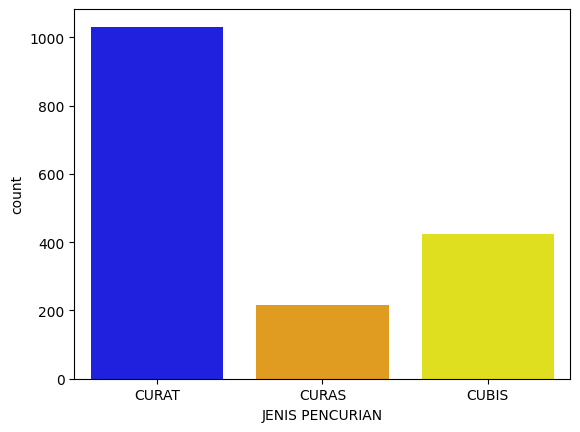

JENIS PENCURIAN
CURAT    1031
CUBIS     425
CURAS     215
Name: count, dtype: int64

In [6]:
# Define custom colors for each gender category
plt_colors = {"CUBIS": "blue", "CURAT": "orange", "CURAS": "yellow"}

# The number of gender in the dataset and its graphic.
sns.countplot(x="JENIS PENCURIAN", data=data_predict, palette=plt_colors.values())
plt.show()

data_predict.loc[:,"JENIS PENCURIAN"].value_counts()

**Renaming Data Column**

In [7]:
# Rename columns
rename_columns = {
    'TEMPAT KEJADIAN PENCURIAN': 'tempat_kejadian_pencurian',
    'WAKTU KEJADIAN': 'waktu_kejadian',
    'PELAKU MENGGUNAKAN ALAT': 'pelaku_menggunakan_alat',
    'SASARAN KEJAHATAN': 'sasaran_kejahatan',
    'JUMLAH KERUGIAN': 'jumlah_kerugian',
    'Modus Operandi': 'mo',
    'JENIS PENCURIAN': 'jenis_pencurian'
}

data_predict.rename(columns=rename_columns, inplace=True)

#**Feature Encoding**

In [8]:
# Encode categorical features
data_predict['tempat_kejadian_pencurian'] = data_predict['tempat_kejadian_pencurian'].map({
    'AREA JALAN RAYA': 0, 'AREA PARKIR': 1, 'DALAM RUMAH': 2, 'GANG RUMAH': 3, 'HALAMAN RUMAH': 4, 'JALAN RAYA': 5, 'parkiran rumah': 6, 'SEKOLAH': 7
})

data_predict['waktu_kejadian'] = data_predict['waktu_kejadian'].map({
    'DINI HARI': 0, 'MALAM': 1, 'PAGI': 2, 'SIANG': 3, 'SORE': 4
})

data_predict['pelaku_menggunakan_alat'] = data_predict['pelaku_menggunakan_alat'].map({'YA': 0, 'TIDAK': 1})

data_predict['sasaran_kejahatan'] = data_predict['sasaran_kejahatan'].map({'BENDA BERGERAK': 0, 'BENDA TIDAK BERGERAK': 1, 'GABUNGAN': 2})

data_predict['jumlah_kerugian'] = data_predict['jumlah_kerugian'].map({'BESAR': 0, 'KECIL': 1})

data_predict['mo'] = data_predict['mo'].map({
    'MENGAMBIL': 0, 'MENGANCAM': 1, 'MENYELINAP': 2, 'MERAMPAS': 3, 'merusak atm': 4, 'merusak brankas': 5, 'MERUSAK KUNCI': 6, 'MERUSAK RUMAH': 7, 'PANJAT TEMBOK': 8, 'PECAH KACA': 9
})

data_predict['jenis_pencurian'] = data_predict['jenis_pencurian'].map({'CUBIS': 0, 'CURAT': 1, 'CURAS': 2})

data_predict

,tempat_kejadian_pencurian,waktu_kejadian,pelaku_menggunakan_alat,sasaran_kejahatan,jumlah_kerugian,mo,jenis_pencurian
0,1,2,0,2,0,6,1
1,1,1,0,0,0,6,1
2,5,1,1,1,1,3,2
3,4,2,0,0,0,6,1
4,2,3,1,1,0,0,0
...,...,...,...,...,...,...,...
1666,2,0,1,1,0,0,0
1667,2,2,1,1,0,0,0
1668,2,1,1,1,0,0,0
1669,2,1,1,1,0,0,0


In [9]:
# Shuffle the dataset
data_predict = shuffle(data_predict, random_state=1)

**Splitting Dataset**

In [10]:
# Split dataset
x = data_predict.iloc[:, :-1].values # Data seluruh kolom, kecuali kolom label
y = data_predict.iloc[:, -1].values # Data kolom label saja (satu kolom terakhir)

In [11]:
x = shuffle(x, random_state=1)
y = shuffle(y, random_state=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.8:
            self.model.stop_training = True

In [14]:
# Instance of the callback
callbacks = MyCallback()

#**Tensorflow Model**

In [15]:
# Create TensorFlow model
model = Sequential()
model.add(Dense(12, input_dim=x.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
def plot_training_history(history):
    # Plotting training accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    plt.ylim(0, 1.0)

    # Plotting training loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.ylim(0, 4.0)

    # Display the plots
    plt.show()

In [17]:
model.summary()

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215 (860.00 B)

 Trainable params: 215 (860.00 B)

 Non-trainable params: 0 (0.00 B)

#**Training**

In [18]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.2, callbacks=[callbacks])

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4122 - loss: 1.1301 - val_accuracy: 0.6624 - val_loss: 0.8751
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6269 - loss: 0.8531 - val_accuracy: 0.6624 - val_loss: 0.6909
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6194 - loss: 0.7107 - val_accuracy: 0.6838 - val_loss: 0.5217
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7022 - loss: 0.4953 - val_accuracy: 0.7991 - val_loss: 0.3935
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.3729 - val_accuracy: 0.9231 - val_loss: 0.3279
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3688 - val_accuracy: 0.9402 - val_loss: 0.2649
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.2871 - val_accuracy: 0.9872 - val_loss: 0.2325


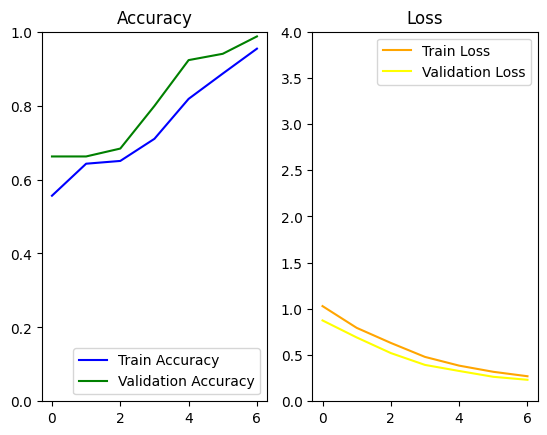

In [19]:
plot_training_history(history)

In [20]:
# Save model to h5
model.save('model_prediksi_jenis_pencurian.h5')

#**Prediction Model Testing**

In [21]:
# Load and predict with saved model
loaded_model = tf.keras.models.load_model('model_prediksi_jenis_pencurian.h5')

new_data = np.array([[1, 2, 0, 2, 1, 6]])
new_pred = loaded_model.predict(new_data)

print('Prediksi untuk data baru:', new_pred.argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediksi untuk data baru: [1]


**Testing Notes:**
* Tempat Kejadian Pencurian (1) -> Area Jalan Raya
* Waktu Kejadian (2) -> Pagi
* Pelaku Menggunakan Alat (0) -> Ya
* Sasaran Kejahatan (2) -> Gabungan
* Jumlah Kerugian (1) -> Kecil
* MO (6) -> Merusak Kunci

**Hasil Prediksi [1]: CURAT (Pencurian Dengan Pemberatan)**



In [22]:
!pip install tensorflowjs

In [23]:
import tensorflowjs as tfjs

In [25]:
tfjs.converters.save_keras_model(model,'sample_data/models')
!zip -r models.zip sample_data/models/

failed to lookup keras version from the file,
    this is likely a weight only file
  adding: sample_data/models/ (stored 0%)
  adding: sample_data/models/group1-shard1of1.bin (deflated 1%)
  adding: sample_data/models/model.json (deflated 77%)


In [26]:
from google.colab import files
files.download('models.zip')
files.download('/content/model_prediksi_jenis_pencurian.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>